In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
commits = pd.read_pickle("commits.pkl")

In [3]:
def isAMD(f):
    return "drivers/gpu/drm/radeon/" in f or "include/uapi/drm/radeon_drm.h" in f or "drivers/gpu/drm/amd/" in f or "include/uapi/drm/amdgpu_drm.h" in f

In [4]:
commits['isAMD'] = commits.files.map(isAMD)

In [5]:
selected = commits[commits.isAMD]

In [49]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        print year, month
        print subset.committer_name.value_counts(normalize=True)[:2]
        result[(year,month)] = subset.committer_name.value_counts(normalize=True)[:2].sum()

2013 1
Alex Deucher     0.92
Daniel Vetter    0.04
Name: committer_name, dtype: float64
2013 2
Alex Deucher    0.65
Dave Airlie     0.15
Name: committer_name, dtype: float64
2013 3
Alex Deucher    0.9
Jiri Kosina     0.1
Name: committer_name, dtype: float64
2013 4
Alex Deucher     0.983333
Bjorn Helgaas    0.016667
Name: committer_name, dtype: float64
2013 5
Alex Deucher    0.84375
Dave Airlie     0.12500
Name: committer_name, dtype: float64
2013 6
Alex Deucher    0.977273
Dave Airlie     0.022727
Name: committer_name, dtype: float64
2013 7
Alex Deucher    0.942529
Dave Airlie     0.045977
Name: committer_name, dtype: float64
2013 8
Alex Deucher    0.915493
Dave Airlie     0.077465
Name: committer_name, dtype: float64
2013 9
Alex Deucher    0.961538
Dave Airlie     0.038462
Name: committer_name, dtype: float64
2013 10
Alex Deucher    0.827586
Dave Airlie     0.137931
Name: committer_name, dtype: float64
2013 11
Alex Deucher    0.935065
Dave Airlie     0.038961
Name: committer_name, dty

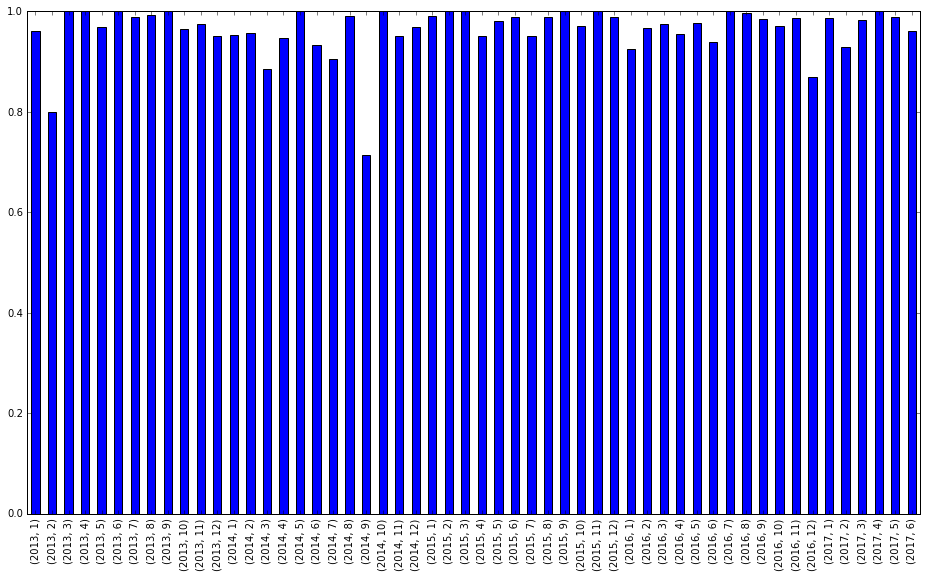

In [50]:
plt.figure(facecolor="white")
s = pd.Series(result)
s.plot('bar', figsize=(16,9), color='blue')

In [51]:
print pd.Series([v for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result.items() if k > (2015,12)]).describe()

count    32.000000
mean      0.958052
std       0.060842
min       0.714286
25%       0.951364
50%       0.971388
75%       0.994718
max       1.000000
dtype: float64
count    18.000000
mean      0.966206
std       0.033090
min       0.870130
25%       0.956901
50%       0.975368
75%       0.986907
max       1.000000
dtype: float64


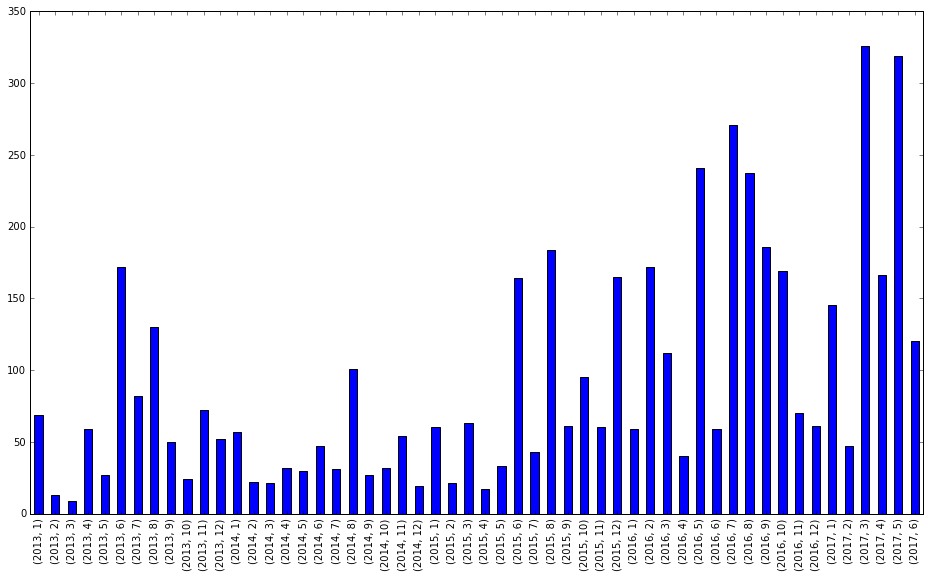

In [52]:

result_a = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        result_a[(year,month)] = subset.committer_name.value_counts(normalize=False)[:1].sum()
plt.figure(facecolor="white")
s = pd.Series(result_a)
s.plot('bar', figsize=(16,9), color='blue')

In [53]:
print pd.Series([v for k,v in result_a.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result_a.items() if k > (2015,12)]).describe()

count     32.000000
mean      56.781250
std       46.388774
min        9.000000
25%       26.250000
50%       45.000000
75%       64.500000
max      184.000000
dtype: float64
count     18.000000
mean     155.555556
std       93.251855
min       40.000000
25%       63.250000
50%      155.500000
75%      224.250000
max      326.000000
dtype: float64


In [54]:

result_a = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        result_a[(year,month)] = subset.committer_name.value_counts(normalize=False)[:2].sum()

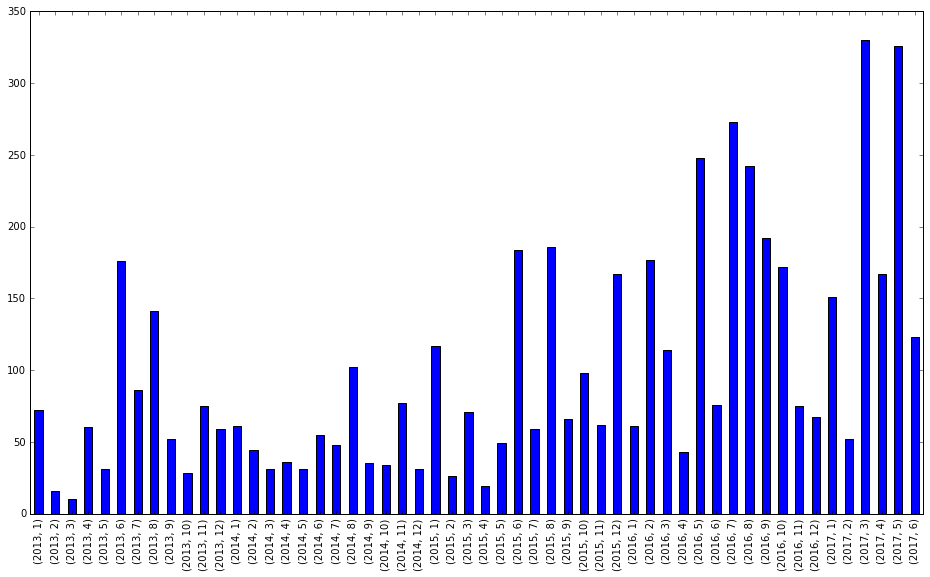

In [55]:
plt.figure(facecolor="white")
s = pd.Series(result_a)
s.plot('bar', figsize=(16,9), color='blue')

In [56]:
print pd.Series([v for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result.items() if k > (2015,12)]).describe()

count    32.000000
mean      0.958052
std       0.060842
min       0.714286
25%       0.951364
50%       0.971388
75%       0.994718
max       1.000000
dtype: float64
count    18.000000
mean      0.966206
std       0.033090
min       0.870130
25%       0.956901
50%       0.975368
75%       0.986907
max       1.000000
dtype: float64


In [57]:
print pd.Series([v for k,v in result_a.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result_a.items() if k > (2015,12)]).describe()

count     32.000000
mean      65.687500
std       47.807705
min       10.000000
25%       31.000000
50%       53.500000
75%       75.500000
max      186.000000
dtype: float64
count     18.000000
mean     160.500000
std       92.940367
min       43.000000
25%       75.250000
50%      159.000000
75%      229.500000
max      330.000000
dtype: float64


In [18]:
# exclude 2015.9 ~ 2015.12

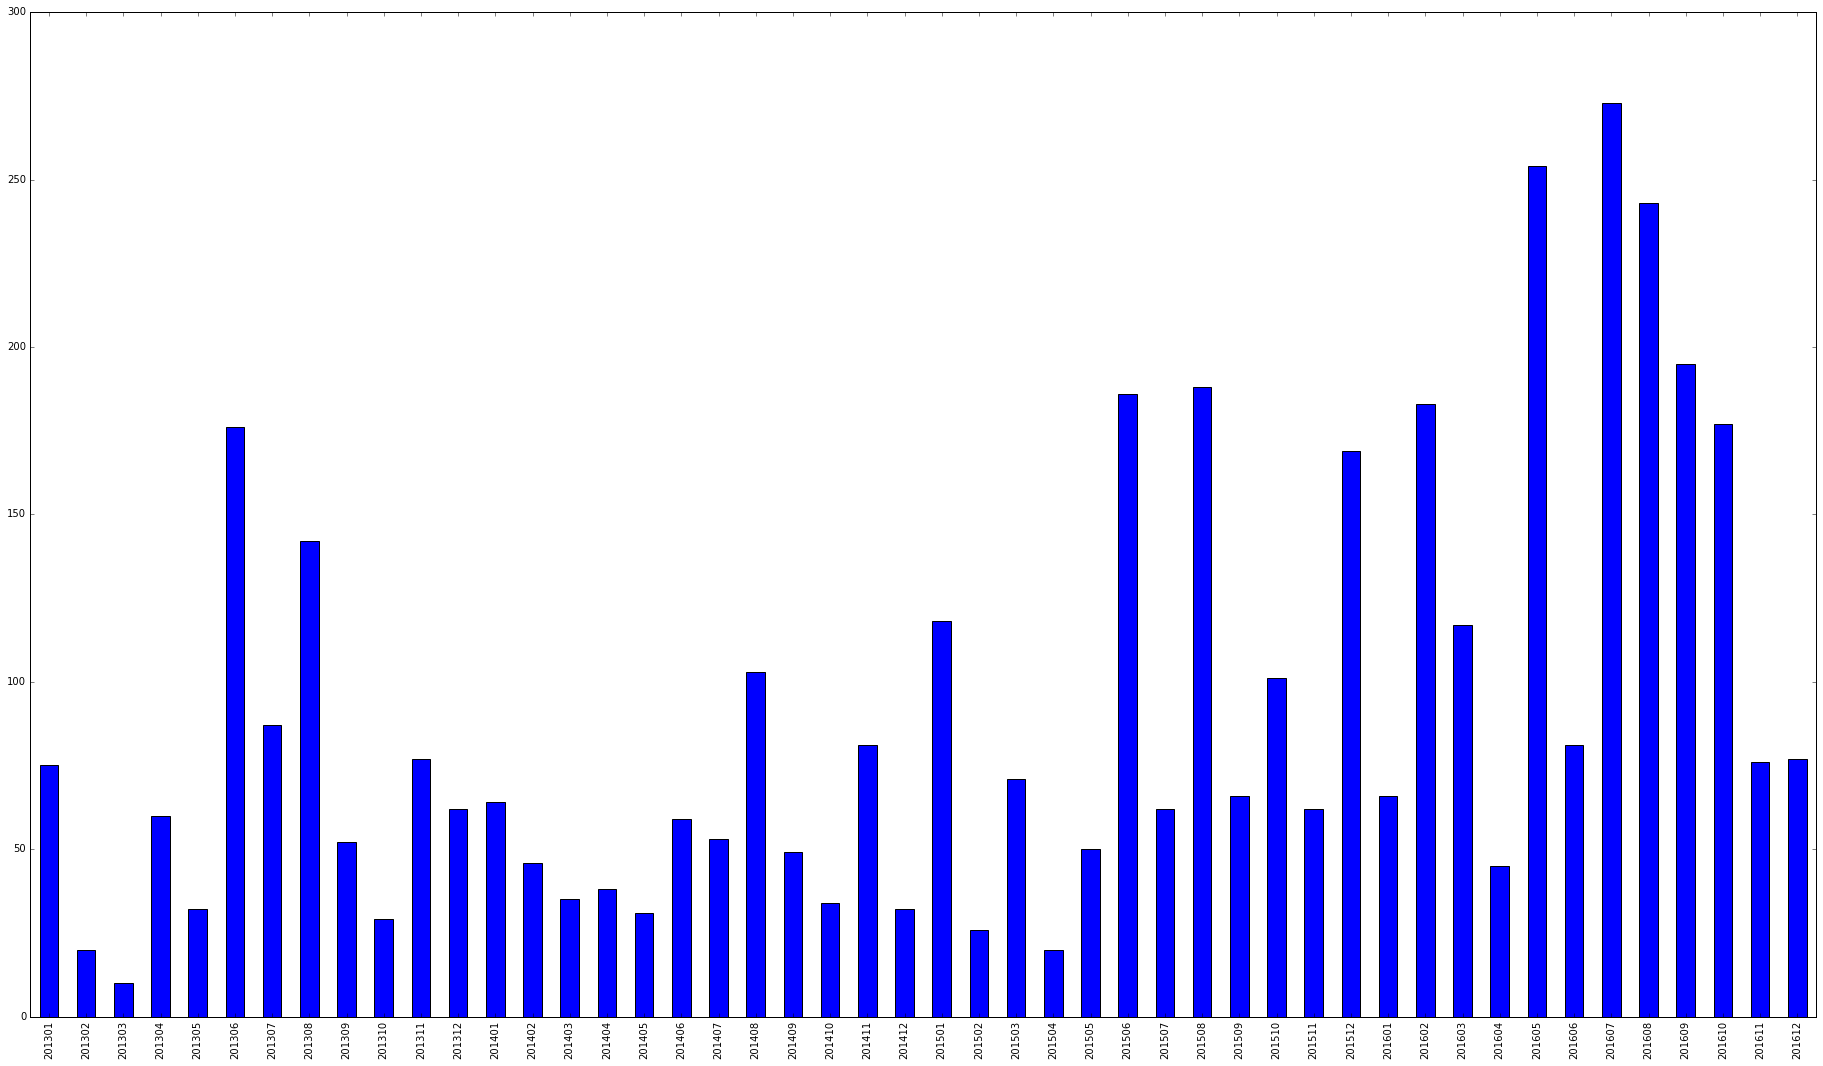

In [19]:
selected[selected.committed_datetime.map(lambda t: t.year * 100 + t.month).map(lambda d: d >= 201300 and d < 201700)].committed_datetime.map(lambda t: t.year*100+t.month).value_counts().sort_index().plot('bar',figsize=(32,18), color='blue')

In [20]:
s = selected[selected.committed_datetime.map(lambda t: t.year * 100 + t.month).map(lambda d: d >= 201211 and d < 201707)].committed_datetime.map(lambda t: t.year*100+t.month).value_counts().sort_index()

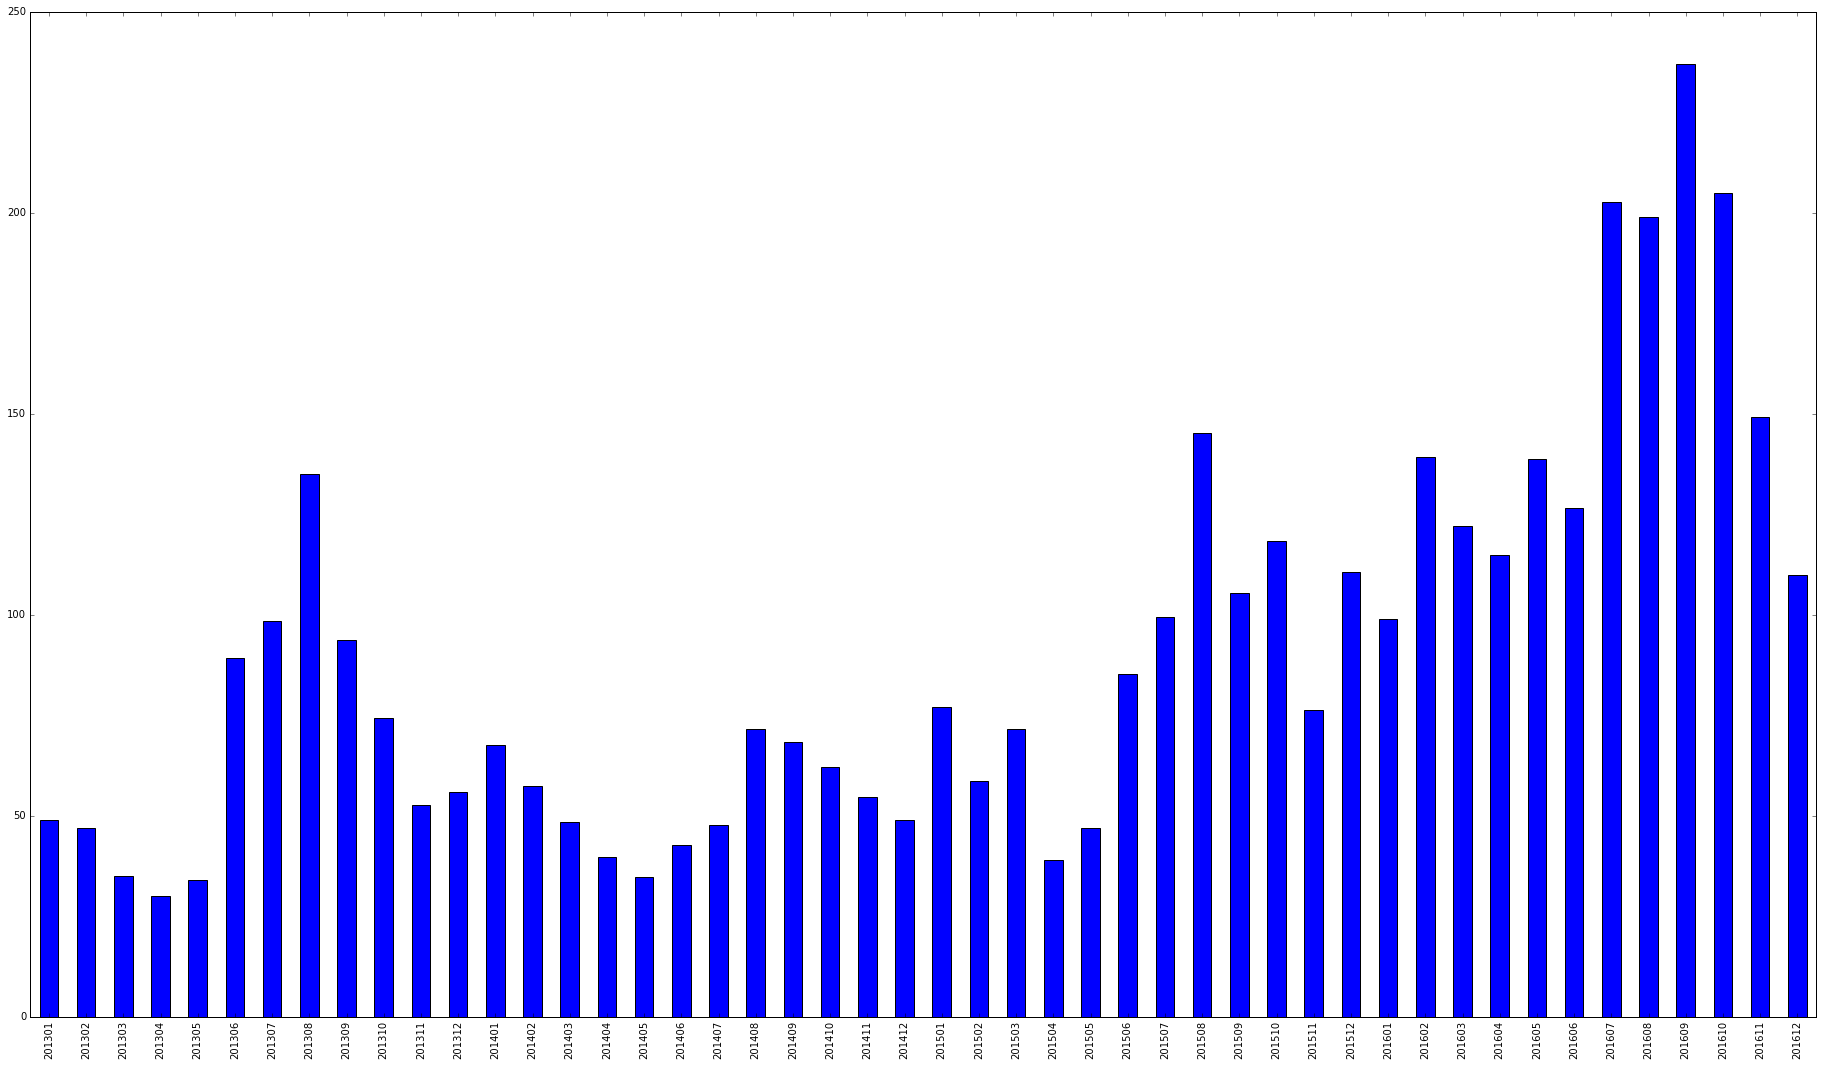

In [21]:
plt.figure(facecolor="white")
s = s.rolling(window=3, center=False).mean()
s = s[(s.index > 201300) & (s.index < 201700)]
s.plot('bar',figsize=(32,18), color='blue')

In [22]:
## overwork

In [23]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        committers = subset.committer_name.value_counts(normalize=True)
        acc = 0.0
        for committer in committers.index:
            df = subset[subset.committer_name == committer]
            s = df.committed_datetime.map(lambda t: t.hour).value_counts(normalize=True)
            if len(s) > 8:
                acc += s[8:].sum() * committers[committer]
        result[(year,month)] = acc

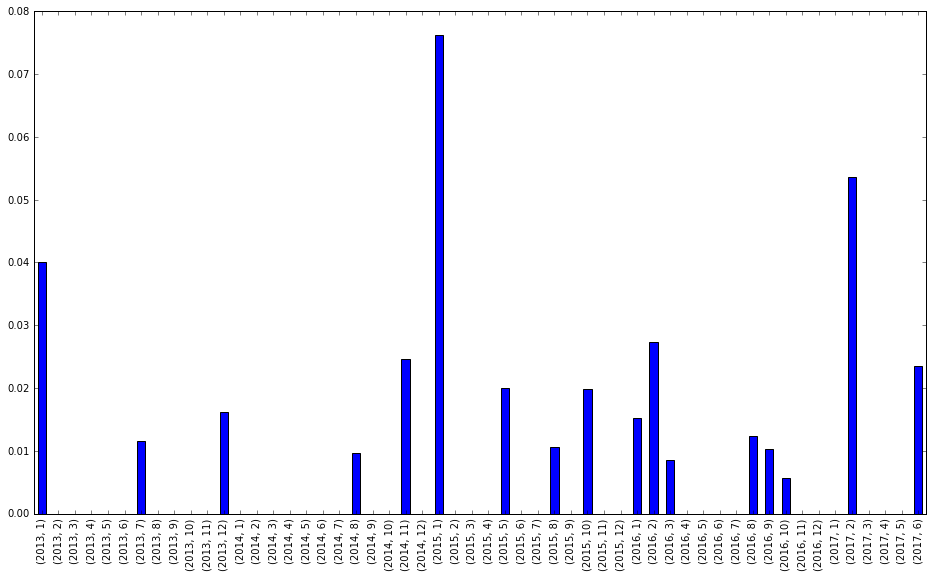

In [24]:
plt.figure(facecolor='white')
pd.Series(result).plot('bar', color='blue', figsize=(16,9))

In [25]:
print pd.Series([v for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result.items() if k > (2015,12)]).describe()

count    32.000000
mean      0.006529
std       0.015722
min       0.000000
25%       0.000000
50%       0.000000
75%       0.002427
max       0.076271
dtype: float64
count    18.000000
mean      0.008682
std       0.014144
min       0.000000
25%       0.000000
50%       0.000000
75%       0.011823
max       0.053571
dtype: float64


In [26]:
## touched files

In [27]:
def count_distinct_files(files_list):
    file_set = set()
    for files in files_list:
        if len(files) == 0:
            continue
        files = files.split(",")
        if len(files) > 230:
            continue
        for f in files:
            file_set.add(f)
    return len(file_set)

In [28]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        top2 = subset.committer_name.value_counts()[:2]
        arr = []
        for committer in top2.index:
            arr.append(count_distinct_files(subset[subset.committer_name == committer]['files']))
        result[(year,month)] = arr

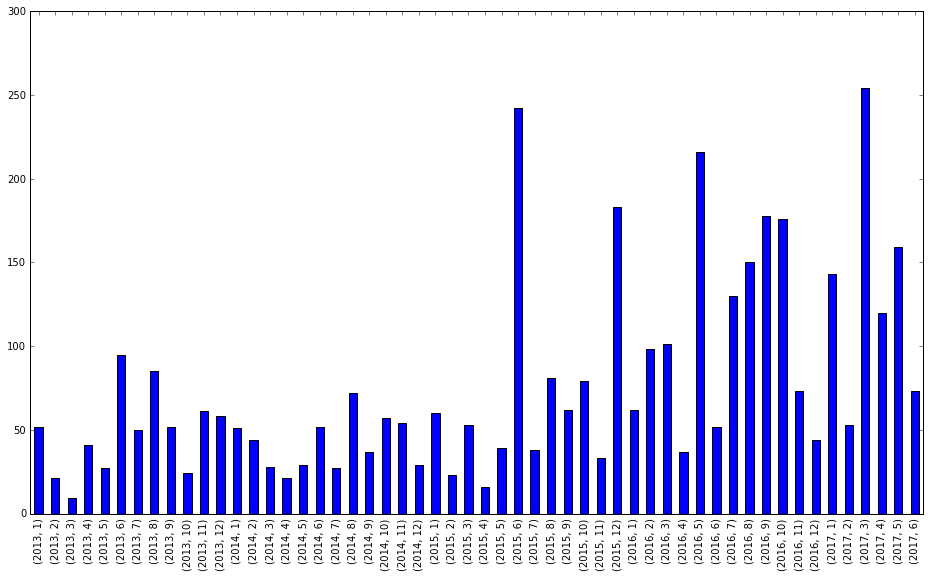

In [29]:
plt.figure(facecolor='white')
pd.DataFrame(result).T[0].plot('bar', color='blue', figsize=(16,9))

In [30]:
print pd.Series([v[0] for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v[0] for k,v in result.items() if k > (2015,12)]).describe()

count     32.000000
mean      50.875000
std       40.483171
min        9.000000
25%       27.750000
50%       47.000000
75%       57.250000
max      242.000000
dtype: float64
count     18.000000
mean     117.722222
std       62.794535
min       37.000000
25%       64.750000
50%      110.500000
75%      156.750000
max      254.000000
dtype: float64


In [31]:
subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (2016 * 1000 + 12)]

In [32]:
top2 = subset.committer_name.value_counts()[:2]

In [33]:
committer = top2.index[0]

In [34]:
subset[subset.committer_name == committer]['files'].map(lambda f: len(f.split(',')))

59935    1
59936    1
59937    1
59938    1
59939    1
59940    1
59941    1
59942    1
59943    1
59944    1
59945    2
60061    2
60468    2
60469    1
60470    1
60471    1
60472    1
60473    1
60474    1
60475    1
60476    1
61902    1
61922    2
61923    1
61924    1
61925    1
61926    3
61927    2
61928    2
62143    3
        ..
62311    1
62312    1
62313    1
62314    1
62315    1
62316    1
62317    1
62318    1
62319    1
62320    1
62321    1
62322    4
62323    1
62324    3
62325    1
62326    2
62327    1
62328    1
62329    4
62330    4
62331    4
62332    1
62333    2
62334    1
62335    1
62336    1
62337    2
62338    1
62339    1
62340    5
Name: files, Length: 61, dtype: int64

In [35]:
## authors

In [36]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        top2 = subset.committer_name.value_counts()[:2]
        arr = []
        for committer in top2.index:
            arr.append(len(set(subset[subset.committer_name == committer]['author_name'])))
        result[(year,month)] = arr

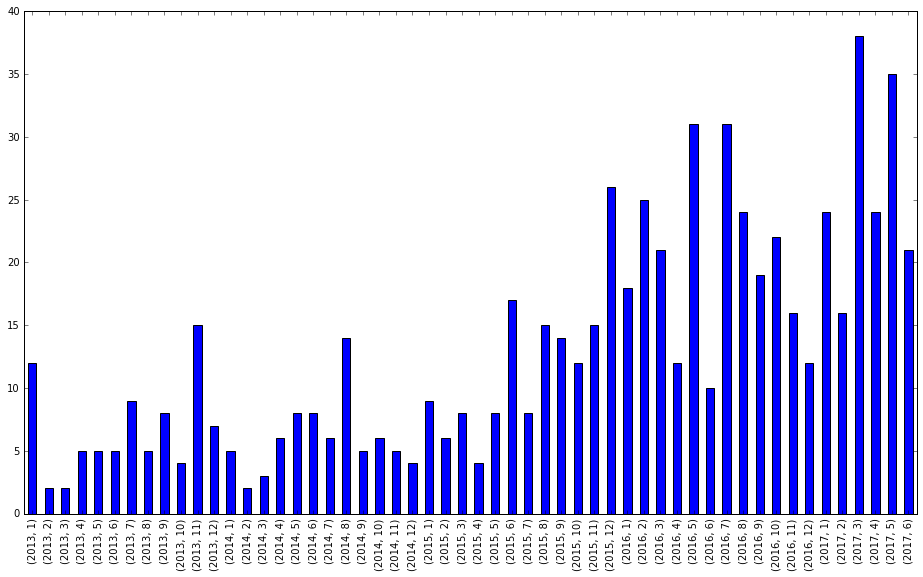

In [37]:
plt.figure(facecolor='white')
pd.DataFrame(result).T[0].plot('bar', color='blue', figsize=(16,9))

In [38]:
print pd.Series([v[0] for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v[0] for k,v in result.items() if k > (2015,12)]).describe()

count    32.000000
mean      7.062500
std       3.876626
min       2.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      17.000000
dtype: float64
count    18.000000
mean     22.166667
std       7.860923
min      10.000000
25%      16.500000
50%      21.500000
75%      24.750000
max      38.000000
dtype: float64


In [39]:
# tag

In [40]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        if year == 2017 and month > 6:
            break
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        desc = subset.message.map(lambda m:  "Acked-by" in m or "Reviewed-by" in m or "Tested-by" in m ).value_counts(normalize=True)[True]
        result[(year,month)] = desc

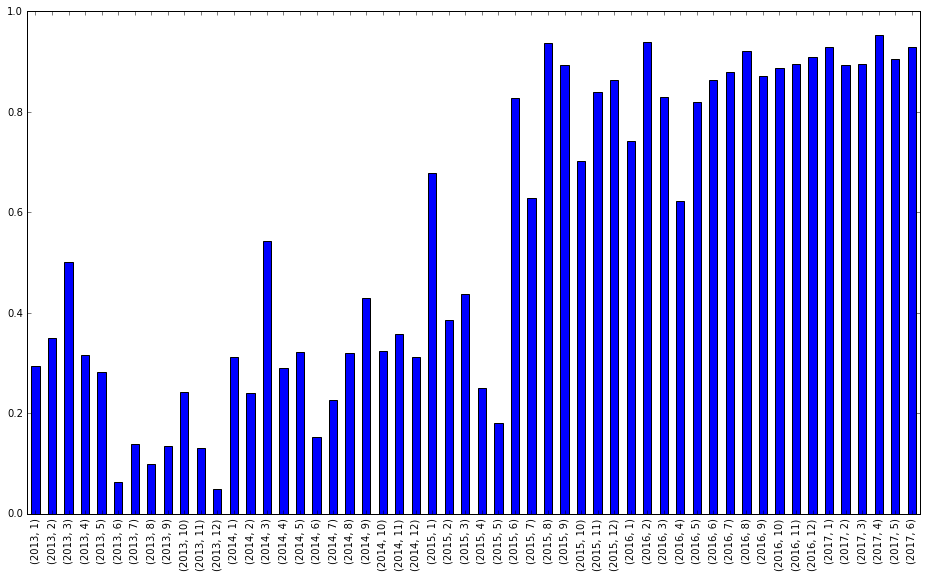

In [41]:
plt.figure(facecolor='white')
pd.Series(result).plot('bar', figsize=(16,9), color='blue')

In [42]:
print pd.Series([v for k,v in result.items() if k < (2015,9)]).describe()
print pd.Series([v for k,v in result.items() if k > (2015,12)]).describe()

count    32.000000
mean      0.335794
std       0.207706
min       0.048387
25%       0.214811
50%       0.312500
75%       0.395604
max       0.936170
dtype: float64
count    18.000000
mean      0.871383
std       0.079783
min       0.622222
25%       0.866097
50%       0.893797
75%       0.918631
max       0.952096
dtype: float64


In [43]:
# delay

In [44]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        if year == 2017 and month > 6:
            break
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        desc = (subset.committed_datetime - subset.authored_datetime).median()
        result[(year,month)] = desc

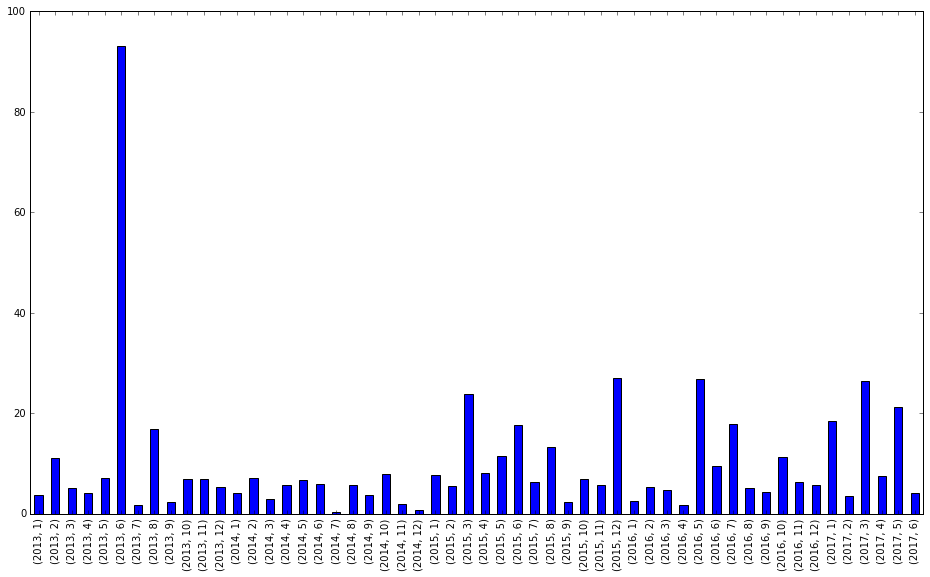

In [45]:
plt.figure(facecolor="white")
pd.Series(result).map(lambda t: t.total_seconds()*1.0 / 86400).plot('bar', color='blue', figsize=(16,9))

In [46]:
before = selected[selected.committed_datetime.map(lambda t: t.year * 100 + t.month).map(lambda d: d >= 201300 and d < 201509)]
after = selected[selected.committed_datetime.map(lambda t: t.year * 100 + t.month).map(lambda d: d >= 201600 and d < 201707)]

In [47]:
(before.committed_datetime - before.authored_datetime).describe()

count                       2168
mean     31 days 04:34:14.055811
std      65 days 10:10:28.765095
min            -1 days +11:37:06
25%       1 days 16:22:59.500000
50%       6 days 18:52:12.500000
75%      23 days 18:07:20.250000
max            636 days 18:52:32
Name: committed_datetime, dtype: object

In [48]:
(after.committed_datetime - after.authored_datetime).describe()

count                       2957
mean     24 days 15:49:32.842407
std      41 days 01:55:06.981512
min            -1 days +16:36:18
25%              3 days 00:43:48
50%             10 days 05:49:17
75%             27 days 06:13:05
max            386 days 02:26:00
Name: committed_datetime, dtype: object